## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  39.387903  1006.425067  0.470845  7.802962  1.638262
1  63.769227   754.616464  0.338051  2.828677  1.356789
2  55.917543   284.406776  0.106255  5.278311  0.380046
3  27.027446   979.013872  0.266990  8.803774  1.608371
4  32.185027  1265.629629  0.175550  4.987638  1.506621


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.21123 | train_mse: 6.73209 | train_mae: 1.90262 |  0:00:00s
epoch 1  | loss: 0.80748 | train_mse: 4.70749 | train_mae: 1.61631 |  0:00:00s


epoch 2  | loss: 0.72687 | train_mse: 3.50196 | train_mae: 1.40794 |  0:00:00s
epoch 3  | loss: 0.67498 | train_mse: 2.79632 | train_mae: 1.27294 |  0:00:00s
epoch 4  | loss: 0.66155 | train_mse: 2.49861 | train_mae: 1.1895  |  0:00:00s


epoch 5  | loss: 0.71382 | train_mse: 2.25938 | train_mae: 1.12334 |  0:00:00s


epoch 6  | loss: 0.57304 | train_mse: 1.95983 | train_mae: 1.04926 |  0:00:01s
epoch 7  | loss: 0.54858 | train_mse: 1.72402 | train_mae: 0.99011 |  0:00:01s
epoch 8  | loss: 0.62905 | train_mse: 1.55204 | train_mae: 0.94999 |  0:00:01s


epoch 9  | loss: 0.58534 | train_mse: 1.38543 | train_mae: 0.90236 |  0:00:01s
epoch 10 | loss: 0.55126 | train_mse: 1.1848  | train_mae: 0.84564 |  0:00:01s
epoch 11 | loss: 0.45267 | train_mse: 1.03352 | train_mae: 0.7978  |  0:00:01s


epoch 12 | loss: 0.43341 | train_mse: 0.88306 | train_mae: 0.74586 |  0:00:01s
epoch 13 | loss: 0.66579 | train_mse: 0.76762 | train_mae: 0.69425 |  0:00:01s


epoch 14 | loss: 0.4167  | train_mse: 0.68266 | train_mae: 0.64879 |  0:00:01s
epoch 15 | loss: 0.47603 | train_mse: 0.63136 | train_mae: 0.61444 |  0:00:01s


epoch 16 | loss: 0.42728 | train_mse: 0.56848 | train_mae: 0.57943 |  0:00:02s
epoch 17 | loss: 0.38795 | train_mse: 0.51947 | train_mae: 0.54958 |  0:00:02s


epoch 18 | loss: 0.52103 | train_mse: 0.4934  | train_mae: 0.53244 |  0:00:02s
epoch 19 | loss: 0.32325 | train_mse: 0.46746 | train_mae: 0.51622 |  0:00:02s


epoch 20 | loss: 0.36955 | train_mse: 0.44526 | train_mae: 0.50167 |  0:00:02s
epoch 21 | loss: 0.28844 | train_mse: 0.4202  | train_mae: 0.48667 |  0:00:02s


epoch 22 | loss: 0.30272 | train_mse: 0.39503 | train_mae: 0.4742  |  0:00:02s
epoch 23 | loss: 0.41162 | train_mse: 0.37599 | train_mae: 0.46157 |  0:00:03s


epoch 24 | loss: 0.35456 | train_mse: 0.35024 | train_mae: 0.44472 |  0:00:03s
epoch 25 | loss: 0.34354 | train_mse: 0.33442 | train_mae: 0.43383 |  0:00:03s


epoch 26 | loss: 0.31003 | train_mse: 0.32538 | train_mae: 0.42462 |  0:00:03s
epoch 27 | loss: 0.407   | train_mse: 0.31235 | train_mae: 0.4164  |  0:00:03s


epoch 28 | loss: 0.23577 | train_mse: 0.3008  | train_mae: 0.41178 |  0:00:03s
epoch 29 | loss: 0.38412 | train_mse: 0.28664 | train_mae: 0.40422 |  0:00:04s


epoch 30 | loss: 0.27566 | train_mse: 0.27604 | train_mae: 0.39614 |  0:00:04s
epoch 31 | loss: 0.38642 | train_mse: 0.26744 | train_mae: 0.39074 |  0:00:04s


epoch 32 | loss: 0.38481 | train_mse: 0.25741 | train_mae: 0.3841  |  0:00:04s
epoch 33 | loss: 0.30614 | train_mse: 0.24349 | train_mae: 0.37423 |  0:00:04s


epoch 34 | loss: 0.27434 | train_mse: 0.2317  | train_mae: 0.36479 |  0:00:04s
epoch 35 | loss: 0.20891 | train_mse: 0.22343 | train_mae: 0.35688 |  0:00:04s
epoch 36 | loss: 0.23427 | train_mse: 0.21528 | train_mae: 0.35093 |  0:00:04s


epoch 37 | loss: 0.32577 | train_mse: 0.20941 | train_mae: 0.34681 |  0:00:05s
epoch 38 | loss: 0.21205 | train_mse: 0.20479 | train_mae: 0.34463 |  0:00:05s
epoch 39 | loss: 0.27982 | train_mse: 0.21695 | train_mae: 0.35188 |  0:00:05s


epoch 40 | loss: 0.21976 | train_mse: 0.20594 | train_mae: 0.34723 |  0:00:05s
epoch 41 | loss: 0.24128 | train_mse: 0.19844 | train_mae: 0.3415  |  0:00:05s


epoch 42 | loss: 0.29437 | train_mse: 0.19921 | train_mae: 0.34795 |  0:00:05s
epoch 43 | loss: 0.17462 | train_mse: 0.1992  | train_mae: 0.34968 |  0:00:05s


epoch 44 | loss: 0.25278 | train_mse: 0.1977  | train_mae: 0.34991 |  0:00:05s
epoch 45 | loss: 0.30894 | train_mse: 0.19238 | train_mae: 0.34702 |  0:00:06s


epoch 46 | loss: 0.24163 | train_mse: 0.18355 | train_mae: 0.33782 |  0:00:06s
epoch 47 | loss: 0.25543 | train_mse: 0.18169 | train_mae: 0.33668 |  0:00:06s


epoch 48 | loss: 0.274   | train_mse: 0.18633 | train_mae: 0.34474 |  0:00:06s
epoch 49 | loss: 0.22864 | train_mse: 0.18657 | train_mae: 0.34534 |  0:00:06s


epoch 50 | loss: 0.20422 | train_mse: 0.18548 | train_mae: 0.34591 |  0:00:06s
epoch 51 | loss: 0.34171 | train_mse: 0.1782  | train_mae: 0.34021 |  0:00:06s
epoch 52 | loss: 0.28866 | train_mse: 0.16859 | train_mae: 0.33372 |  0:00:06s


epoch 53 | loss: 0.35956 | train_mse: 0.16135 | train_mae: 0.32642 |  0:00:06s
epoch 54 | loss: 0.2161  | train_mse: 0.15489 | train_mae: 0.32003 |  0:00:07s
epoch 55 | loss: 0.34285 | train_mse: 0.14831 | train_mae: 0.31333 |  0:00:07s


epoch 56 | loss: 0.32773 | train_mse: 0.14514 | train_mae: 0.31171 |  0:00:07s
epoch 57 | loss: 0.21417 | train_mse: 0.14008 | train_mae: 0.30832 |  0:00:07s
epoch 58 | loss: 0.3903  | train_mse: 0.1385  | train_mae: 0.30783 |  0:00:07s


epoch 59 | loss: 0.25832 | train_mse: 0.13622 | train_mae: 0.30445 |  0:00:07s
epoch 60 | loss: 0.20523 | train_mse: 0.13482 | train_mae: 0.30318 |  0:00:07s
epoch 61 | loss: 0.27508 | train_mse: 0.13218 | train_mae: 0.30112 |  0:00:07s


epoch 62 | loss: 0.29688 | train_mse: 0.13021 | train_mae: 0.29962 |  0:00:07s
epoch 63 | loss: 0.24483 | train_mse: 0.12973 | train_mae: 0.29932 |  0:00:07s
epoch 64 | loss: 0.29684 | train_mse: 0.12969 | train_mae: 0.29837 |  0:00:08s


epoch 65 | loss: 0.18096 | train_mse: 0.13063 | train_mae: 0.29928 |  0:00:08s
epoch 66 | loss: 0.21878 | train_mse: 0.12662 | train_mae: 0.29322 |  0:00:08s
epoch 67 | loss: 0.2234  | train_mse: 0.12567 | train_mae: 0.29334 |  0:00:08s


epoch 68 | loss: 0.17432 | train_mse: 0.13026 | train_mae: 0.30052 |  0:00:08s
epoch 69 | loss: 0.28095 | train_mse: 0.13625 | train_mae: 0.30184 |  0:00:08s


epoch 70 | loss: 0.25235 | train_mse: 0.12934 | train_mae: 0.29654 |  0:00:08s
epoch 71 | loss: 0.22743 | train_mse: 0.12727 | train_mae: 0.29764 |  0:00:08s
epoch 72 | loss: 0.27881 | train_mse: 0.1256  | train_mae: 0.29382 |  0:00:08s


epoch 73 | loss: 0.18265 | train_mse: 0.12329 | train_mae: 0.28866 |  0:00:08s
epoch 74 | loss: 0.15298 | train_mse: 0.1198  | train_mae: 0.28574 |  0:00:08s
epoch 75 | loss: 0.2076  | train_mse: 0.12526 | train_mae: 0.28782 |  0:00:09s


epoch 76 | loss: 0.20439 | train_mse: 0.11983 | train_mae: 0.28623 |  0:00:09s
epoch 77 | loss: 0.20621 | train_mse: 0.11803 | train_mae: 0.28466 |  0:00:09s
epoch 78 | loss: 0.18951 | train_mse: 0.12157 | train_mae: 0.28772 |  0:00:09s


epoch 79 | loss: 0.26731 | train_mse: 0.12933 | train_mae: 0.28898 |  0:00:09s
epoch 80 | loss: 0.25477 | train_mse: 0.13033 | train_mae: 0.28681 |  0:00:09s


epoch 81 | loss: 0.2897  | train_mse: 0.1251  | train_mae: 0.2784  |  0:00:09s
epoch 82 | loss: 0.21737 | train_mse: 0.12276 | train_mae: 0.27715 |  0:00:09s
epoch 83 | loss: 0.10656 | train_mse: 0.12187 | train_mae: 0.27572 |  0:00:09s


epoch 84 | loss: 0.16136 | train_mse: 0.12786 | train_mae: 0.27832 |  0:00:09s
epoch 85 | loss: 0.18095 | train_mse: 0.12292 | train_mae: 0.27406 |  0:00:10s
epoch 86 | loss: 0.388   | train_mse: 0.12039 | train_mae: 0.27215 |  0:00:10s


epoch 87 | loss: 0.21716 | train_mse: 0.12184 | train_mae: 0.27326 |  0:00:10s
epoch 88 | loss: 0.22037 | train_mse: 0.12265 | train_mae: 0.2729  |  0:00:10s
epoch 89 | loss: 0.21052 | train_mse: 0.12032 | train_mae: 0.26964 |  0:00:10s


epoch 90 | loss: 0.25549 | train_mse: 0.12086 | train_mae: 0.27053 |  0:00:10s
epoch 91 | loss: 0.24779 | train_mse: 0.12035 | train_mae: 0.27019 |  0:00:10s


epoch 92 | loss: 0.33574 | train_mse: 0.11887 | train_mae: 0.27255 |  0:00:10s
epoch 93 | loss: 0.24241 | train_mse: 0.11908 | train_mae: 0.27837 |  0:00:10s
epoch 94 | loss: 0.19404 | train_mse: 0.1167  | train_mae: 0.27994 |  0:00:10s


epoch 95 | loss: 0.24232 | train_mse: 0.11668 | train_mae: 0.28113 |  0:00:10s
epoch 96 | loss: 0.17454 | train_mse: 0.11752 | train_mae: 0.28258 |  0:00:11s
epoch 97 | loss: 0.16783 | train_mse: 0.11783 | train_mae: 0.28309 |  0:00:11s


epoch 98 | loss: 0.15898 | train_mse: 0.11842 | train_mae: 0.28455 |  0:00:11s
epoch 99 | loss: 0.13265 | train_mse: 0.11819 | train_mae: 0.28407 |  0:00:11s
epoch 100| loss: 0.15195 | train_mse: 0.11908 | train_mae: 0.28371 |  0:00:11s


epoch 101| loss: 0.29773 | train_mse: 0.11784 | train_mae: 0.28375 |  0:00:11s
epoch 102| loss: 0.1551  | train_mse: 0.11447 | train_mae: 0.28214 |  0:00:11s


epoch 103| loss: 0.14223 | train_mse: 0.11219 | train_mae: 0.28174 |  0:00:11s
epoch 104| loss: 0.28655 | train_mse: 0.11065 | train_mae: 0.28151 |  0:00:11s
epoch 105| loss: 0.19699 | train_mse: 0.10891 | train_mae: 0.27997 |  0:00:11s


epoch 106| loss: 0.19803 | train_mse: 0.10574 | train_mae: 0.27493 |  0:00:11s
epoch 107| loss: 0.19398 | train_mse: 0.10208 | train_mae: 0.26907 |  0:00:12s


epoch 108| loss: 0.18837 | train_mse: 0.09893 | train_mae: 0.26439 |  0:00:12s
epoch 109| loss: 0.17671 | train_mse: 0.09748 | train_mae: 0.26155 |  0:00:12s
epoch 110| loss: 0.1811  | train_mse: 0.0937  | train_mae: 0.25401 |  0:00:12s


epoch 111| loss: 0.15607 | train_mse: 0.09302 | train_mae: 0.25136 |  0:00:12s
epoch 112| loss: 0.26456 | train_mse: 0.09187 | train_mae: 0.25034 |  0:00:12s


epoch 113| loss: 0.27252 | train_mse: 0.09215 | train_mae: 0.25212 |  0:00:12s
epoch 114| loss: 0.20708 | train_mse: 0.09439 | train_mae: 0.25492 |  0:00:12s
epoch 115| loss: 0.20066 | train_mse: 0.09545 | train_mae: 0.25545 |  0:00:12s


epoch 116| loss: 0.12505 | train_mse: 0.09601 | train_mae: 0.25559 |  0:00:12s
epoch 117| loss: 0.15254 | train_mse: 0.09728 | train_mae: 0.25898 |  0:00:13s
epoch 118| loss: 0.17422 | train_mse: 0.09767 | train_mae: 0.25851 |  0:00:13s


epoch 119| loss: 0.19765 | train_mse: 0.09825 | train_mae: 0.26052 |  0:00:13s
epoch 120| loss: 0.24878 | train_mse: 0.09793 | train_mae: 0.26089 |  0:00:13s
epoch 121| loss: 0.13561 | train_mse: 0.09972 | train_mae: 0.26359 |  0:00:13s


epoch 122| loss: 0.16192 | train_mse: 0.10199 | train_mae: 0.26653 |  0:00:13s
epoch 123| loss: 0.24055 | train_mse: 0.10143 | train_mae: 0.26566 |  0:00:13s


epoch 124| loss: 0.19699 | train_mse: 0.09845 | train_mae: 0.26222 |  0:00:13s
epoch 125| loss: 0.27915 | train_mse: 0.09612 | train_mae: 0.25889 |  0:00:13s
epoch 126| loss: 0.2132  | train_mse: 0.09839 | train_mae: 0.26136 |  0:00:13s


epoch 127| loss: 0.1446  | train_mse: 0.09748 | train_mae: 0.26027 |  0:00:13s
epoch 128| loss: 0.16228 | train_mse: 0.09645 | train_mae: 0.25786 |  0:00:14s


epoch 129| loss: 0.17775 | train_mse: 0.0954  | train_mae: 0.25669 |  0:00:14s
epoch 130| loss: 0.12716 | train_mse: 0.09464 | train_mae: 0.25594 |  0:00:14s
epoch 131| loss: 0.16956 | train_mse: 0.09436 | train_mae: 0.2553  |  0:00:14s


epoch 132| loss: 0.24976 | train_mse: 0.09557 | train_mae: 0.25705 |  0:00:14s
epoch 133| loss: 0.1401  | train_mse: 0.08776 | train_mae: 0.25047 |  0:00:14s
epoch 134| loss: 0.14974 | train_mse: 0.08282 | train_mae: 0.24231 |  0:00:14s


epoch 135| loss: 0.21952 | train_mse: 0.08467 | train_mae: 0.2467  |  0:00:14s
epoch 136| loss: 0.17151 | train_mse: 0.0854  | train_mae: 0.24764 |  0:00:14s


epoch 137| loss: 0.14589 | train_mse: 0.08788 | train_mae: 0.2503  |  0:00:14s
epoch 138| loss: 0.24541 | train_mse: 0.08871 | train_mae: 0.25192 |  0:00:15s
epoch 139| loss: 0.33147 | train_mse: 0.0939  | train_mae: 0.25912 |  0:00:15s


epoch 140| loss: 0.12722 | train_mse: 0.09327 | train_mae: 0.25797 |  0:00:15s
epoch 141| loss: 0.09759 | train_mse: 0.09272 | train_mae: 0.25675 |  0:00:15s
epoch 142| loss: 0.11667 | train_mse: 0.09263 | train_mae: 0.25724 |  0:00:15s


epoch 143| loss: 0.19126 | train_mse: 0.08957 | train_mae: 0.25395 |  0:00:15s
epoch 144| loss: 0.16825 | train_mse: 0.08932 | train_mae: 0.2525  |  0:00:15s
epoch 145| loss: 0.19325 | train_mse: 0.08856 | train_mae: 0.25157 |  0:00:15s


epoch 146| loss: 0.26245 | train_mse: 0.08983 | train_mae: 0.25265 |  0:00:15s
epoch 147| loss: 0.1335  | train_mse: 0.09267 | train_mae: 0.25521 |  0:00:15s
epoch 148| loss: 0.24806 | train_mse: 0.093   | train_mae: 0.25384 |  0:00:15s


epoch 149| loss: 0.14288 | train_mse: 0.09335 | train_mae: 0.25131 |  0:00:16s
epoch 150| loss: 0.13112 | train_mse: 0.09262 | train_mae: 0.24912 |  0:00:16s
epoch 151| loss: 0.26729 | train_mse: 0.0943  | train_mae: 0.24869 |  0:00:16s


epoch 152| loss: 0.1992  | train_mse: 0.09539 | train_mae: 0.24918 |  0:00:16s
epoch 153| loss: 0.15272 | train_mse: 0.09437 | train_mae: 0.24601 |  0:00:16s
epoch 154| loss: 0.13694 | train_mse: 0.09687 | train_mae: 0.247   |  0:00:16s


epoch 155| loss: 0.19031 | train_mse: 0.09585 | train_mae: 0.24492 |  0:00:16s
epoch 156| loss: 0.13909 | train_mse: 0.09251 | train_mae: 0.24023 |  0:00:16s
epoch 157| loss: 0.14727 | train_mse: 0.09096 | train_mae: 0.23858 |  0:00:16s


epoch 158| loss: 0.18055 | train_mse: 0.09058 | train_mae: 0.23912 |  0:00:16s
epoch 159| loss: 0.17764 | train_mse: 0.08943 | train_mae: 0.23767 |  0:00:16s
epoch 160| loss: 0.21836 | train_mse: 0.08632 | train_mae: 0.23421 |  0:00:17s


epoch 161| loss: 0.12893 | train_mse: 0.08477 | train_mae: 0.22979 |  0:00:17s
epoch 162| loss: 0.16148 | train_mse: 0.07767 | train_mae: 0.22121 |  0:00:17s
epoch 163| loss: 0.15173 | train_mse: 0.07602 | train_mae: 0.21851 |  0:00:17s


epoch 164| loss: 0.1353  | train_mse: 0.07464 | train_mae: 0.21768 |  0:00:17s
epoch 165| loss: 0.25734 | train_mse: 0.075   | train_mae: 0.21762 |  0:00:17s


epoch 166| loss: 0.18517 | train_mse: 0.07566 | train_mae: 0.2178  |  0:00:17s
epoch 167| loss: 0.24726 | train_mse: 0.07681 | train_mae: 0.21935 |  0:00:17s
epoch 168| loss: 0.11057 | train_mse: 0.07554 | train_mae: 0.22028 |  0:00:17s


epoch 169| loss: 0.11881 | train_mse: 0.07467 | train_mae: 0.21714 |  0:00:17s
epoch 170| loss: 0.18749 | train_mse: 0.07713 | train_mae: 0.22145 |  0:00:17s
epoch 171| loss: 0.16733 | train_mse: 0.07935 | train_mae: 0.22596 |  0:00:18s


epoch 172| loss: 0.13164 | train_mse: 0.07833 | train_mae: 0.22532 |  0:00:18s
epoch 173| loss: 0.18307 | train_mse: 0.08042 | train_mae: 0.22663 |  0:00:18s
epoch 174| loss: 0.15478 | train_mse: 0.0833  | train_mae: 0.23055 |  0:00:18s


epoch 175| loss: 0.2125  | train_mse: 0.08419 | train_mae: 0.23317 |  0:00:18s
epoch 176| loss: 0.16123 | train_mse: 0.08526 | train_mae: 0.23481 |  0:00:18s


epoch 177| loss: 0.16395 | train_mse: 0.0864  | train_mae: 0.23905 |  0:00:18s
epoch 178| loss: 0.16673 | train_mse: 0.08491 | train_mae: 0.23824 |  0:00:18s
epoch 179| loss: 0.12339 | train_mse: 0.08297 | train_mae: 0.23621 |  0:00:18s


epoch 180| loss: 0.13856 | train_mse: 0.08149 | train_mae: 0.23513 |  0:00:18s
epoch 181| loss: 0.12715 | train_mse: 0.08118 | train_mae: 0.23507 |  0:00:18s
epoch 182| loss: 0.19447 | train_mse: 0.08106 | train_mae: 0.23494 |  0:00:19s


epoch 183| loss: 0.11062 | train_mse: 0.07988 | train_mae: 0.23224 |  0:00:19s
epoch 184| loss: 0.09383 | train_mse: 0.07834 | train_mae: 0.22923 |  0:00:19s
epoch 185| loss: 0.09333 | train_mse: 0.07673 | train_mae: 0.22613 |  0:00:19s


epoch 186| loss: 0.16382 | train_mse: 0.07607 | train_mae: 0.2244  |  0:00:19s
epoch 187| loss: 0.17397 | train_mse: 0.07537 | train_mae: 0.22325 |  0:00:19s


epoch 188| loss: 0.12872 | train_mse: 0.07496 | train_mae: 0.2208  |  0:00:19s
epoch 189| loss: 0.18125 | train_mse: 0.07572 | train_mae: 0.2214  |  0:00:19s
epoch 190| loss: 0.10385 | train_mse: 0.07356 | train_mae: 0.21998 |  0:00:19s


epoch 191| loss: 0.10027 | train_mse: 0.07124 | train_mae: 0.21865 |  0:00:19s
epoch 192| loss: 0.12685 | train_mse: 0.07079 | train_mae: 0.2193  |  0:00:19s
epoch 193| loss: 0.21345 | train_mse: 0.07057 | train_mae: 0.21942 |  0:00:20s


epoch 194| loss: 0.10136 | train_mse: 0.07221 | train_mae: 0.22184 |  0:00:20s
epoch 195| loss: 0.1259  | train_mse: 0.07217 | train_mae: 0.22111 |  0:00:20s
epoch 196| loss: 0.13601 | train_mse: 0.07413 | train_mae: 0.22259 |  0:00:20s


epoch 197| loss: 0.1885  | train_mse: 0.07523 | train_mae: 0.22258 |  0:00:20s
epoch 198| loss: 0.10434 | train_mse: 0.07477 | train_mae: 0.21973 |  0:00:20s


epoch 199| loss: 0.1425  | train_mse: 0.07644 | train_mae: 0.22024 |  0:00:20s
epoch 200| loss: 0.12188 | train_mse: 0.07475 | train_mae: 0.21805 |  0:00:20s
epoch 201| loss: 0.13191 | train_mse: 0.07243 | train_mae: 0.21467 |  0:00:20s


epoch 202| loss: 0.1094  | train_mse: 0.06974 | train_mae: 0.21098 |  0:00:20s
epoch 203| loss: 0.12534 | train_mse: 0.06868 | train_mae: 0.20919 |  0:00:20s
epoch 204| loss: 0.16802 | train_mse: 0.06616 | train_mae: 0.20618 |  0:00:21s


epoch 205| loss: 0.13974 | train_mse: 0.06693 | train_mae: 0.20775 |  0:00:21s
epoch 206| loss: 0.08297 | train_mse: 0.06811 | train_mae: 0.20845 |  0:00:21s
epoch 207| loss: 0.15584 | train_mse: 0.06643 | train_mae: 0.20636 |  0:00:21s


epoch 208| loss: 0.09135 | train_mse: 0.06279 | train_mae: 0.20151 |  0:00:21s
epoch 209| loss: 0.21678 | train_mse: 0.06581 | train_mae: 0.20584 |  0:00:21s


epoch 210| loss: 0.12005 | train_mse: 0.06409 | train_mae: 0.20504 |  0:00:21s
epoch 211| loss: 0.20274 | train_mse: 0.06539 | train_mae: 0.20701 |  0:00:21s
epoch 212| loss: 0.16584 | train_mse: 0.06595 | train_mae: 0.20854 |  0:00:21s


epoch 213| loss: 0.10845 | train_mse: 0.06727 | train_mae: 0.21027 |  0:00:21s
epoch 214| loss: 0.09441 | train_mse: 0.06966 | train_mae: 0.21332 |  0:00:22s
epoch 215| loss: 0.14563 | train_mse: 0.06912 | train_mae: 0.21275 |  0:00:22s


epoch 216| loss: 0.11611 | train_mse: 0.06833 | train_mae: 0.21209 |  0:00:22s
epoch 217| loss: 0.10879 | train_mse: 0.06561 | train_mae: 0.2083  |  0:00:22s
epoch 218| loss: 0.12615 | train_mse: 0.064   | train_mae: 0.2057  |  0:00:22s


epoch 219| loss: 0.24503 | train_mse: 0.06256 | train_mae: 0.20579 |  0:00:22s
epoch 220| loss: 0.0915  | train_mse: 0.062   | train_mae: 0.20512 |  0:00:22s
epoch 221| loss: 0.12179 | train_mse: 0.06351 | train_mae: 0.20799 |  0:00:22s


epoch 222| loss: 0.12938 | train_mse: 0.06306 | train_mae: 0.20694 |  0:00:22s
epoch 223| loss: 0.15906 | train_mse: 0.0644  | train_mae: 0.20735 |  0:00:22s
epoch 224| loss: 0.11614 | train_mse: 0.06511 | train_mae: 0.20924 |  0:00:22s


epoch 225| loss: 0.13972 | train_mse: 0.06795 | train_mae: 0.21223 |  0:00:23s
epoch 226| loss: 0.16368 | train_mse: 0.06591 | train_mae: 0.21012 |  0:00:23s
epoch 227| loss: 0.0875  | train_mse: 0.06118 | train_mae: 0.20112 |  0:00:23s


epoch 228| loss: 0.11684 | train_mse: 0.06514 | train_mae: 0.20671 |  0:00:23s
epoch 229| loss: 0.09642 | train_mse: 0.06009 | train_mae: 0.19814 |  0:00:23s
epoch 230| loss: 0.39052 | train_mse: 0.0595  | train_mae: 0.19972 |  0:00:23s


epoch 231| loss: 0.18649 | train_mse: 0.06032 | train_mae: 0.20159 |  0:00:23s
epoch 232| loss: 0.09107 | train_mse: 0.05987 | train_mae: 0.20097 |  0:00:23s
epoch 233| loss: 0.1336  | train_mse: 0.05898 | train_mae: 0.19792 |  0:00:23s


epoch 234| loss: 0.16556 | train_mse: 0.06019 | train_mae: 0.20121 |  0:00:23s
epoch 235| loss: 0.09687 | train_mse: 0.06263 | train_mae: 0.20406 |  0:00:23s
epoch 236| loss: 0.13479 | train_mse: 0.06416 | train_mae: 0.20677 |  0:00:24s


epoch 237| loss: 0.15183 | train_mse: 0.06282 | train_mae: 0.20531 |  0:00:24s
epoch 238| loss: 0.17524 | train_mse: 0.06325 | train_mae: 0.20541 |  0:00:24s
epoch 239| loss: 0.12053 | train_mse: 0.0621  | train_mae: 0.20277 |  0:00:24s


epoch 240| loss: 0.27538 | train_mse: 0.06635 | train_mae: 0.20921 |  0:00:24s
epoch 241| loss: 0.13618 | train_mse: 0.06673 | train_mae: 0.20939 |  0:00:24s


epoch 242| loss: 0.07814 | train_mse: 0.0643  | train_mae: 0.20542 |  0:00:24s
epoch 243| loss: 0.15028 | train_mse: 0.06254 | train_mae: 0.20252 |  0:00:24s
epoch 244| loss: 0.12431 | train_mse: 0.06082 | train_mae: 0.19974 |  0:00:24s


epoch 245| loss: 0.11655 | train_mse: 0.05994 | train_mae: 0.19886 |  0:00:24s
epoch 246| loss: 0.16447 | train_mse: 0.05883 | train_mae: 0.19649 |  0:00:25s
epoch 247| loss: 0.11702 | train_mse: 0.05801 | train_mae: 0.19505 |  0:00:25s


epoch 248| loss: 0.08717 | train_mse: 0.05695 | train_mae: 0.19395 |  0:00:25s
epoch 249| loss: 0.10633 | train_mse: 0.05767 | train_mae: 0.19354 |  0:00:25s
epoch 250| loss: 0.1238  | train_mse: 0.05711 | train_mae: 0.19062 |  0:00:25s


epoch 251| loss: 0.11156 | train_mse: 0.05688 | train_mae: 0.18938 |  0:00:25s
epoch 252| loss: 0.18503 | train_mse: 0.05665 | train_mae: 0.18999 |  0:00:25s


epoch 253| loss: 0.08953 | train_mse: 0.05566 | train_mae: 0.18968 |  0:00:25s
epoch 254| loss: 0.10681 | train_mse: 0.0567  | train_mae: 0.19104 |  0:00:25s
epoch 255| loss: 0.09592 | train_mse: 0.05708 | train_mae: 0.19164 |  0:00:25s


epoch 256| loss: 0.15752 | train_mse: 0.05801 | train_mae: 0.19165 |  0:00:25s
epoch 257| loss: 0.12063 | train_mse: 0.05997 | train_mae: 0.19375 |  0:00:26s


epoch 258| loss: 0.09376 | train_mse: 0.06011 | train_mae: 0.19408 |  0:00:26s
epoch 259| loss: 0.14062 | train_mse: 0.06117 | train_mae: 0.19649 |  0:00:26s


epoch 260| loss: 0.11207 | train_mse: 0.06141 | train_mae: 0.19749 |  0:00:26s
epoch 261| loss: 0.09773 | train_mse: 0.06124 | train_mae: 0.19766 |  0:00:26s


epoch 262| loss: 0.19382 | train_mse: 0.06086 | train_mae: 0.19694 |  0:00:26s
epoch 263| loss: 0.13578 | train_mse: 0.05969 | train_mae: 0.19424 |  0:00:27s


epoch 264| loss: 0.37271 | train_mse: 0.05953 | train_mae: 0.19413 |  0:00:27s
epoch 265| loss: 0.12369 | train_mse: 0.05908 | train_mae: 0.19446 |  0:00:27s


epoch 266| loss: 0.14083 | train_mse: 0.05913 | train_mae: 0.19449 |  0:00:27s
epoch 267| loss: 0.11924 | train_mse: 0.05826 | train_mae: 0.19303 |  0:00:27s


epoch 268| loss: 0.17369 | train_mse: 0.05728 | train_mae: 0.1913  |  0:00:27s


epoch 269| loss: 0.11313 | train_mse: 0.05673 | train_mae: 0.19024 |  0:00:28s
epoch 270| loss: 0.14224 | train_mse: 0.05717 | train_mae: 0.19231 |  0:00:28s


epoch 271| loss: 0.13054 | train_mse: 0.05805 | train_mae: 0.19308 |  0:00:28s


epoch 272| loss: 0.15413 | train_mse: 0.05785 | train_mae: 0.19382 |  0:00:28s


epoch 273| loss: 0.08741 | train_mse: 0.05816 | train_mae: 0.19509 |  0:00:29s


epoch 274| loss: 0.15234 | train_mse: 0.05766 | train_mae: 0.19493 |  0:00:29s
epoch 275| loss: 0.09839 | train_mse: 0.05713 | train_mae: 0.19393 |  0:00:29s


epoch 276| loss: 0.11254 | train_mse: 0.05756 | train_mae: 0.19496 |  0:00:29s
epoch 277| loss: 0.12093 | train_mse: 0.05839 | train_mae: 0.197   |  0:00:29s


epoch 278| loss: 0.18838 | train_mse: 0.06153 | train_mae: 0.20312 |  0:00:30s
epoch 279| loss: 0.13751 | train_mse: 0.0631  | train_mae: 0.20614 |  0:00:30s


epoch 280| loss: 0.08796 | train_mse: 0.06394 | train_mae: 0.20602 |  0:00:30s
epoch 281| loss: 0.11752 | train_mse: 0.06501 | train_mae: 0.2051  |  0:00:30s


epoch 282| loss: 0.14877 | train_mse: 0.06458 | train_mae: 0.20503 |  0:00:30s
epoch 283| loss: 0.06606 | train_mse: 0.0656  | train_mae: 0.20631 |  0:00:30s
epoch 284| loss: 0.12828 | train_mse: 0.06523 | train_mae: 0.20676 |  0:00:30s


epoch 285| loss: 0.12391 | train_mse: 0.06337 | train_mae: 0.20401 |  0:00:30s
epoch 286| loss: 0.19249 | train_mse: 0.06281 | train_mae: 0.20371 |  0:00:31s
epoch 287| loss: 0.09637 | train_mse: 0.06346 | train_mae: 0.20427 |  0:00:31s


epoch 288| loss: 0.0858  | train_mse: 0.06356 | train_mae: 0.20418 |  0:00:31s
epoch 289| loss: 0.08784 | train_mse: 0.06344 | train_mae: 0.20183 |  0:00:31s
epoch 290| loss: 0.14789 | train_mse: 0.06179 | train_mae: 0.19985 |  0:00:31s


epoch 291| loss: 0.16069 | train_mse: 0.05935 | train_mae: 0.19488 |  0:00:31s
epoch 292| loss: 0.10713 | train_mse: 0.05733 | train_mae: 0.1905  |  0:00:31s
epoch 293| loss: 0.10398 | train_mse: 0.0577  | train_mae: 0.19073 |  0:00:31s


epoch 294| loss: 0.16402 | train_mse: 0.05816 | train_mae: 0.19065 |  0:00:31s
epoch 295| loss: 0.10892 | train_mse: 0.05729 | train_mae: 0.18765 |  0:00:31s
epoch 296| loss: 0.16166 | train_mse: 0.05599 | train_mae: 0.186   |  0:00:32s


epoch 297| loss: 0.12059 | train_mse: 0.05651 | train_mae: 0.18789 |  0:00:32s
epoch 298| loss: 0.17758 | train_mse: 0.05685 | train_mae: 0.1883  |  0:00:32s
epoch 299| loss: 0.0906  | train_mse: 0.05642 | train_mae: 0.18856 |  0:00:32s


epoch 300| loss: 0.09766 | train_mse: 0.05666 | train_mae: 0.19058 |  0:00:32s
epoch 301| loss: 0.15937 | train_mse: 0.05628 | train_mae: 0.19168 |  0:00:32s
epoch 302| loss: 0.26531 | train_mse: 0.05845 | train_mae: 0.19638 |  0:00:32s


epoch 303| loss: 0.10753 | train_mse: 0.05902 | train_mae: 0.19773 |  0:00:32s
epoch 304| loss: 0.08963 | train_mse: 0.05889 | train_mae: 0.19759 |  0:00:32s
epoch 305| loss: 0.25556 | train_mse: 0.06001 | train_mae: 0.19939 |  0:00:32s


epoch 306| loss: 0.12064 | train_mse: 0.05978 | train_mae: 0.19937 |  0:00:32s
epoch 307| loss: 0.10918 | train_mse: 0.05991 | train_mae: 0.20039 |  0:00:33s
epoch 308| loss: 0.07128 | train_mse: 0.0585  | train_mae: 0.19783 |  0:00:33s


epoch 309| loss: 0.09987 | train_mse: 0.05596 | train_mae: 0.19365 |  0:00:33s
epoch 310| loss: 0.11495 | train_mse: 0.05567 | train_mae: 0.19433 |  0:00:33s
epoch 311| loss: 0.07476 | train_mse: 0.05606 | train_mae: 0.19468 |  0:00:33s


epoch 312| loss: 0.07997 | train_mse: 0.05534 | train_mae: 0.19268 |  0:00:33s
epoch 313| loss: 0.10161 | train_mse: 0.0555  | train_mae: 0.19194 |  0:00:33s


epoch 314| loss: 0.09336 | train_mse: 0.05569 | train_mae: 0.19088 |  0:00:33s
epoch 315| loss: 0.0919  | train_mse: 0.05534 | train_mae: 0.19037 |  0:00:33s
epoch 316| loss: 0.077   | train_mse: 0.05562 | train_mae: 0.19138 |  0:00:33s


epoch 317| loss: 0.10904 | train_mse: 0.0552  | train_mae: 0.19026 |  0:00:33s
epoch 318| loss: 0.08667 | train_mse: 0.05461 | train_mae: 0.18958 |  0:00:34s
epoch 319| loss: 0.12191 | train_mse: 0.05361 | train_mae: 0.18709 |  0:00:34s


epoch 320| loss: 0.12148 | train_mse: 0.0534  | train_mae: 0.18604 |  0:00:34s
epoch 321| loss: 0.11658 | train_mse: 0.05374 | train_mae: 0.18541 |  0:00:34s
epoch 322| loss: 0.09837 | train_mse: 0.05467 | train_mae: 0.18626 |  0:00:34s


epoch 323| loss: 0.1003  | train_mse: 0.05463 | train_mae: 0.18521 |  0:00:34s
epoch 324| loss: 0.09625 | train_mse: 0.05511 | train_mae: 0.1863  |  0:00:34s
epoch 325| loss: 0.08295 | train_mse: 0.0563  | train_mae: 0.18814 |  0:00:34s


epoch 326| loss: 0.12867 | train_mse: 0.05664 | train_mae: 0.1872  |  0:00:34s
epoch 327| loss: 0.13318 | train_mse: 0.05733 | train_mae: 0.18821 |  0:00:34s


epoch 328| loss: 0.1602  | train_mse: 0.05815 | train_mae: 0.18979 |  0:00:34s
epoch 329| loss: 0.2984  | train_mse: 0.05821 | train_mae: 0.19047 |  0:00:35s
epoch 330| loss: 0.06026 | train_mse: 0.0583  | train_mae: 0.19074 |  0:00:35s


epoch 331| loss: 0.23577 | train_mse: 0.05632 | train_mae: 0.18683 |  0:00:35s
epoch 332| loss: 0.1088  | train_mse: 0.05523 | train_mae: 0.18598 |  0:00:35s
epoch 333| loss: 0.09605 | train_mse: 0.05477 | train_mae: 0.18511 |  0:00:35s


epoch 334| loss: 0.27295 | train_mse: 0.05476 | train_mae: 0.1845  |  0:00:35s
epoch 335| loss: 0.12798 | train_mse: 0.05321 | train_mae: 0.18081 |  0:00:35s


epoch 336| loss: 0.10332 | train_mse: 0.0523  | train_mae: 0.17845 |  0:00:35s
epoch 337| loss: 0.08869 | train_mse: 0.05126 | train_mae: 0.17762 |  0:00:35s
epoch 338| loss: 0.08976 | train_mse: 0.05097 | train_mae: 0.17682 |  0:00:35s


epoch 339| loss: 0.22439 | train_mse: 0.0522  | train_mae: 0.18031 |  0:00:35s
epoch 340| loss: 0.10303 | train_mse: 0.05428 | train_mae: 0.1843  |  0:00:36s
epoch 341| loss: 0.17146 | train_mse: 0.05655 | train_mae: 0.18729 |  0:00:36s


epoch 342| loss: 0.10892 | train_mse: 0.05572 | train_mae: 0.18456 |  0:00:36s
epoch 343| loss: 0.16803 | train_mse: 0.05362 | train_mae: 0.18025 |  0:00:36s
epoch 344| loss: 0.07175 | train_mse: 0.05341 | train_mae: 0.18078 |  0:00:36s


epoch 345| loss: 0.09027 | train_mse: 0.0537  | train_mae: 0.18125 |  0:00:36s
epoch 346| loss: 0.14946 | train_mse: 0.05362 | train_mae: 0.18137 |  0:00:36s
epoch 347| loss: 0.0881  | train_mse: 0.05292 | train_mae: 0.18093 |  0:00:36s


epoch 348| loss: 0.15233 | train_mse: 0.05246 | train_mae: 0.18057 |  0:00:36s
epoch 349| loss: 0.1505  | train_mse: 0.05373 | train_mae: 0.18326 |  0:00:36s
epoch 350| loss: 0.08525 | train_mse: 0.05445 | train_mae: 0.18436 |  0:00:36s


epoch 351| loss: 0.16032 | train_mse: 0.05516 | train_mae: 0.18552 |  0:00:37s
epoch 352| loss: 0.15978 | train_mse: 0.05355 | train_mae: 0.18253 |  0:00:37s
epoch 353| loss: 0.168   | train_mse: 0.05248 | train_mae: 0.1806  |  0:00:37s


epoch 354| loss: 0.12834 | train_mse: 0.05374 | train_mae: 0.18322 |  0:00:37s
epoch 355| loss: 0.12759 | train_mse: 0.0536  | train_mae: 0.1828  |  0:00:37s
epoch 356| loss: 0.08121 | train_mse: 0.05377 | train_mae: 0.1833  |  0:00:37s


epoch 357| loss: 0.08252 | train_mse: 0.05378 | train_mae: 0.18339 |  0:00:37s
epoch 358| loss: 0.17163 | train_mse: 0.05326 | train_mae: 0.18319 |  0:00:37s
epoch 359| loss: 0.14859 | train_mse: 0.05177 | train_mae: 0.17965 |  0:00:37s


epoch 360| loss: 0.09815 | train_mse: 0.04908 | train_mae: 0.17383 |  0:00:37s
epoch 361| loss: 0.15544 | train_mse: 0.04827 | train_mae: 0.17272 |  0:00:37s
epoch 362| loss: 0.21265 | train_mse: 0.04865 | train_mae: 0.17493 |  0:00:38s


epoch 363| loss: 0.09986 | train_mse: 0.05087 | train_mae: 0.18085 |  0:00:38s
epoch 364| loss: 0.13112 | train_mse: 0.04967 | train_mae: 0.17835 |  0:00:38s
epoch 365| loss: 0.07651 | train_mse: 0.04871 | train_mae: 0.17684 |  0:00:38s


epoch 366| loss: 0.18043 | train_mse: 0.04788 | train_mae: 0.17468 |  0:00:38s
epoch 367| loss: 0.18149 | train_mse: 0.04889 | train_mae: 0.17674 |  0:00:38s


epoch 368| loss: 0.10224 | train_mse: 0.04988 | train_mae: 0.17792 |  0:00:38s
epoch 369| loss: 0.09601 | train_mse: 0.05167 | train_mae: 0.18088 |  0:00:38s
epoch 370| loss: 0.092   | train_mse: 0.0526  | train_mae: 0.1825  |  0:00:38s


epoch 371| loss: 0.11973 | train_mse: 0.05247 | train_mae: 0.18094 |  0:00:38s
epoch 372| loss: 0.16164 | train_mse: 0.05145 | train_mae: 0.17763 |  0:00:38s
epoch 373| loss: 0.13189 | train_mse: 0.05059 | train_mae: 0.1743  |  0:00:39s


epoch 374| loss: 0.07893 | train_mse: 0.05013 | train_mae: 0.17363 |  0:00:39s
epoch 375| loss: 0.1242  | train_mse: 0.04985 | train_mae: 0.17402 |  0:00:39s
epoch 376| loss: 0.08976 | train_mse: 0.05002 | train_mae: 0.17473 |  0:00:39s


epoch 377| loss: 0.14043 | train_mse: 0.05009 | train_mae: 0.17419 |  0:00:39s
epoch 378| loss: 0.08102 | train_mse: 0.04947 | train_mae: 0.17248 |  0:00:39s


epoch 379| loss: 0.10535 | train_mse: 0.04945 | train_mae: 0.17242 |  0:00:39s
epoch 380| loss: 0.10334 | train_mse: 0.04994 | train_mae: 0.17254 |  0:00:39s
epoch 381| loss: 0.1762  | train_mse: 0.05078 | train_mae: 0.17479 |  0:00:39s


epoch 382| loss: 0.11606 | train_mse: 0.05256 | train_mae: 0.17849 |  0:00:39s
epoch 383| loss: 0.10321 | train_mse: 0.05328 | train_mae: 0.17972 |  0:00:39s
epoch 384| loss: 0.23159 | train_mse: 0.05436 | train_mae: 0.18259 |  0:00:40s


epoch 385| loss: 0.07939 | train_mse: 0.05495 | train_mae: 0.18376 |  0:00:40s
epoch 386| loss: 0.096   | train_mse: 0.0533  | train_mae: 0.18097 |  0:00:40s
epoch 387| loss: 0.11165 | train_mse: 0.05233 | train_mae: 0.18004 |  0:00:40s


epoch 388| loss: 0.07391 | train_mse: 0.05205 | train_mae: 0.17863 |  0:00:40s
epoch 389| loss: 0.07661 | train_mse: 0.05173 | train_mae: 0.17833 |  0:00:40s


epoch 390| loss: 0.10622 | train_mse: 0.0526  | train_mae: 0.1778  |  0:00:40s
epoch 391| loss: 0.12672 | train_mse: 0.05214 | train_mae: 0.177   |  0:00:40s
epoch 392| loss: 0.06527 | train_mse: 0.05058 | train_mae: 0.17258 |  0:00:40s


epoch 393| loss: 0.06954 | train_mse: 0.05015 | train_mae: 0.17012 |  0:00:40s
epoch 394| loss: 0.10186 | train_mse: 0.05055 | train_mae: 0.16981 |  0:00:41s
epoch 395| loss: 0.14415 | train_mse: 0.0501  | train_mae: 0.16839 |  0:00:41s


epoch 396| loss: 0.10784 | train_mse: 0.04897 | train_mae: 0.16891 |  0:00:41s
epoch 397| loss: 0.09896 | train_mse: 0.04891 | train_mae: 0.17036 |  0:00:41s
epoch 398| loss: 0.09172 | train_mse: 0.04942 | train_mae: 0.17373 |  0:00:41s


epoch 399| loss: 0.19392 | train_mse: 0.05089 | train_mae: 0.17689 |  0:00:41s
epoch 400| loss: 0.1139  | train_mse: 0.05357 | train_mae: 0.183   |  0:00:41s


epoch 401| loss: 0.08864 | train_mse: 0.05689 | train_mae: 0.18916 |  0:00:41s
epoch 402| loss: 0.11776 | train_mse: 0.05811 | train_mae: 0.19067 |  0:00:41s
epoch 403| loss: 0.08819 | train_mse: 0.05976 | train_mae: 0.19246 |  0:00:41s


epoch 404| loss: 0.08188 | train_mse: 0.05971 | train_mae: 0.19079 |  0:00:41s
epoch 405| loss: 0.13199 | train_mse: 0.0586  | train_mae: 0.18868 |  0:00:42s
epoch 406| loss: 0.08291 | train_mse: 0.0595  | train_mae: 0.191   |  0:00:42s


epoch 407| loss: 0.09218 | train_mse: 0.05648 | train_mae: 0.18699 |  0:00:42s
epoch 408| loss: 0.08981 | train_mse: 0.0562  | train_mae: 0.18644 |  0:00:42s
epoch 409| loss: 0.0755  | train_mse: 0.05776 | train_mae: 0.18843 |  0:00:42s


epoch 410| loss: 0.06854 | train_mse: 0.05987 | train_mae: 0.19104 |  0:00:42s
epoch 411| loss: 0.0727  | train_mse: 0.05991 | train_mae: 0.19092 |  0:00:42s


epoch 412| loss: 0.09134 | train_mse: 0.05773 | train_mae: 0.18766 |  0:00:42s
epoch 413| loss: 0.11739 | train_mse: 0.05836 | train_mae: 0.18921 |  0:00:42s
epoch 414| loss: 0.14203 | train_mse: 0.0572  | train_mae: 0.18761 |  0:00:42s


epoch 415| loss: 0.09563 | train_mse: 0.05555 | train_mae: 0.1864  |  0:00:42s
epoch 416| loss: 0.07894 | train_mse: 0.0534  | train_mae: 0.18333 |  0:00:43s
epoch 417| loss: 0.09542 | train_mse: 0.05313 | train_mae: 0.18213 |  0:00:43s


epoch 418| loss: 0.17298 | train_mse: 0.05227 | train_mae: 0.18033 |  0:00:43s
epoch 419| loss: 0.07559 | train_mse: 0.05146 | train_mae: 0.17896 |  0:00:43s
epoch 420| loss: 0.15989 | train_mse: 0.05183 | train_mae: 0.17864 |  0:00:43s


epoch 421| loss: 0.08527 | train_mse: 0.05024 | train_mae: 0.17493 |  0:00:43s
epoch 422| loss: 0.14489 | train_mse: 0.05031 | train_mae: 0.17579 |  0:00:43s


epoch 423| loss: 0.11303 | train_mse: 0.05114 | train_mae: 0.17815 |  0:00:43s
epoch 424| loss: 0.08429 | train_mse: 0.0511  | train_mae: 0.17805 |  0:00:43s


epoch 425| loss: 0.0749  | train_mse: 0.04917 | train_mae: 0.17409 |  0:00:44s
epoch 426| loss: 0.11273 | train_mse: 0.04891 | train_mae: 0.17265 |  0:00:44s


epoch 427| loss: 0.11426 | train_mse: 0.04786 | train_mae: 0.17071 |  0:00:44s
epoch 428| loss: 0.06571 | train_mse: 0.04823 | train_mae: 0.17188 |  0:00:44s


epoch 429| loss: 0.08753 | train_mse: 0.04963 | train_mae: 0.17535 |  0:00:44s
epoch 430| loss: 0.1075  | train_mse: 0.04948 | train_mae: 0.17444 |  0:00:44s
epoch 431| loss: 0.14234 | train_mse: 0.05025 | train_mae: 0.17638 |  0:00:44s


epoch 432| loss: 0.14163 | train_mse: 0.04943 | train_mae: 0.17367 |  0:00:44s
epoch 433| loss: 0.12668 | train_mse: 0.04757 | train_mae: 0.16988 |  0:00:44s
epoch 434| loss: 0.07854 | train_mse: 0.04702 | train_mae: 0.16978 |  0:00:45s


epoch 435| loss: 0.10191 | train_mse: 0.04758 | train_mae: 0.1708  |  0:00:45s
epoch 436| loss: 0.07235 | train_mse: 0.04627 | train_mae: 0.16863 |  0:00:45s
epoch 437| loss: 0.07787 | train_mse: 0.0451  | train_mae: 0.16719 |  0:00:45s


epoch 438| loss: 0.15874 | train_mse: 0.04488 | train_mae: 0.16765 |  0:00:45s
epoch 439| loss: 0.13674 | train_mse: 0.04354 | train_mae: 0.16455 |  0:00:45s


epoch 440| loss: 0.10416 | train_mse: 0.04426 | train_mae: 0.16566 |  0:00:45s
epoch 441| loss: 0.13703 | train_mse: 0.04464 | train_mae: 0.16606 |  0:00:45s
epoch 442| loss: 0.09063 | train_mse: 0.0453  | train_mae: 0.16697 |  0:00:45s


epoch 443| loss: 0.09781 | train_mse: 0.04505 | train_mae: 0.16654 |  0:00:45s
epoch 444| loss: 0.06423 | train_mse: 0.04613 | train_mae: 0.16852 |  0:00:46s
epoch 445| loss: 0.07246 | train_mse: 0.04557 | train_mae: 0.16908 |  0:00:46s


epoch 446| loss: 0.21359 | train_mse: 0.04567 | train_mae: 0.16995 |  0:00:46s
epoch 447| loss: 0.19608 | train_mse: 0.04408 | train_mae: 0.16721 |  0:00:46s
epoch 448| loss: 0.14178 | train_mse: 0.04365 | train_mae: 0.16639 |  0:00:46s


epoch 449| loss: 0.09855 | train_mse: 0.04379 | train_mae: 0.16565 |  0:00:46s
epoch 450| loss: 0.09425 | train_mse: 0.04293 | train_mae: 0.16352 |  0:00:46s


epoch 451| loss: 0.06928 | train_mse: 0.04361 | train_mae: 0.16597 |  0:00:46s
epoch 452| loss: 0.12134 | train_mse: 0.04356 | train_mae: 0.1659  |  0:00:46s
epoch 453| loss: 0.08402 | train_mse: 0.0441  | train_mae: 0.16664 |  0:00:46s


epoch 454| loss: 0.10534 | train_mse: 0.04463 | train_mae: 0.16696 |  0:00:46s
epoch 455| loss: 0.16774 | train_mse: 0.04381 | train_mae: 0.16419 |  0:00:47s
epoch 456| loss: 0.14671 | train_mse: 0.0439  | train_mae: 0.16343 |  0:00:47s


epoch 457| loss: 0.08802 | train_mse: 0.0434  | train_mae: 0.16168 |  0:00:47s
epoch 458| loss: 0.07101 | train_mse: 0.04382 | train_mae: 0.16107 |  0:00:47s
epoch 459| loss: 0.15827 | train_mse: 0.04371 | train_mae: 0.16077 |  0:00:47s


epoch 460| loss: 0.06688 | train_mse: 0.04482 | train_mae: 0.16251 |  0:00:47s
epoch 461| loss: 0.11342 | train_mse: 0.04575 | train_mae: 0.16405 |  0:00:47s


epoch 462| loss: 0.17874 | train_mse: 0.04572 | train_mae: 0.16365 |  0:00:47s
epoch 463| loss: 0.0642  | train_mse: 0.04517 | train_mae: 0.16275 |  0:00:47s
epoch 464| loss: 0.07622 | train_mse: 0.04548 | train_mae: 0.16363 |  0:00:47s


epoch 465| loss: 0.16381 | train_mse: 0.04491 | train_mae: 0.16293 |  0:00:47s
epoch 466| loss: 0.08358 | train_mse: 0.04465 | train_mae: 0.16289 |  0:00:48s
epoch 467| loss: 0.13696 | train_mse: 0.04506 | train_mae: 0.16501 |  0:00:48s


epoch 468| loss: 0.06556 | train_mse: 0.04456 | train_mae: 0.16269 |  0:00:48s
epoch 469| loss: 0.12055 | train_mse: 0.04453 | train_mae: 0.16232 |  0:00:48s
epoch 470| loss: 0.15455 | train_mse: 0.04292 | train_mae: 0.15968 |  0:00:48s


epoch 471| loss: 0.23203 | train_mse: 0.04308 | train_mae: 0.15968 |  0:00:48s
epoch 472| loss: 0.07986 | train_mse: 0.04393 | train_mae: 0.16197 |  0:00:48s
epoch 473| loss: 0.11231 | train_mse: 0.04437 | train_mae: 0.16277 |  0:00:48s


epoch 474| loss: 0.11307 | train_mse: 0.04624 | train_mae: 0.16707 |  0:00:48s
epoch 475| loss: 0.1088  | train_mse: 0.04589 | train_mae: 0.16595 |  0:00:48s
epoch 476| loss: 0.1243  | train_mse: 0.04673 | train_mae: 0.1684  |  0:00:48s


epoch 477| loss: 0.10579 | train_mse: 0.04805 | train_mae: 0.17152 |  0:00:49s
epoch 478| loss: 0.05398 | train_mse: 0.04763 | train_mae: 0.17115 |  0:00:49s
epoch 479| loss: 0.07384 | train_mse: 0.04774 | train_mae: 0.17161 |  0:00:49s


epoch 480| loss: 0.07235 | train_mse: 0.04557 | train_mae: 0.16784 |  0:00:49s
epoch 481| loss: 0.05213 | train_mse: 0.04492 | train_mae: 0.16591 |  0:00:49s
epoch 482| loss: 0.084   | train_mse: 0.04427 | train_mae: 0.16406 |  0:00:49s


epoch 483| loss: 0.15599 | train_mse: 0.04358 | train_mae: 0.16307 |  0:00:49s
epoch 484| loss: 0.11168 | train_mse: 0.04192 | train_mae: 0.16092 |  0:00:49s
epoch 485| loss: 0.10917 | train_mse: 0.04063 | train_mae: 0.15851 |  0:00:49s


epoch 486| loss: 0.20125 | train_mse: 0.04007 | train_mae: 0.15814 |  0:00:49s
epoch 487| loss: 0.17209 | train_mse: 0.03997 | train_mae: 0.15821 |  0:00:50s
epoch 488| loss: 0.06117 | train_mse: 0.04062 | train_mae: 0.15905 |  0:00:50s


epoch 489| loss: 0.08254 | train_mse: 0.0415  | train_mae: 0.16139 |  0:00:50s
epoch 490| loss: 0.05229 | train_mse: 0.04191 | train_mae: 0.16267 |  0:00:50s
epoch 491| loss: 0.05539 | train_mse: 0.04151 | train_mae: 0.16241 |  0:00:50s


epoch 492| loss: 0.09198 | train_mse: 0.04172 | train_mae: 0.16293 |  0:00:50s
epoch 493| loss: 0.16268 | train_mse: 0.04224 | train_mae: 0.16322 |  0:00:50s


epoch 494| loss: 0.10656 | train_mse: 0.04209 | train_mae: 0.16323 |  0:00:50s
epoch 495| loss: 0.1381  | train_mse: 0.04226 | train_mae: 0.1625  |  0:00:50s


epoch 496| loss: 0.08759 | train_mse: 0.04376 | train_mae: 0.16426 |  0:00:51s
epoch 497| loss: 0.08396 | train_mse: 0.04305 | train_mae: 0.16116 |  0:00:51s


epoch 498| loss: 0.1169  | train_mse: 0.042   | train_mae: 0.15849 |  0:00:51s
epoch 499| loss: 0.08424 | train_mse: 0.04118 | train_mae: 0.15613 |  0:00:51s


epoch 500| loss: 0.10881 | train_mse: 0.04113 | train_mae: 0.15515 |  0:00:51s
epoch 501| loss: 0.09933 | train_mse: 0.04039 | train_mae: 0.15302 |  0:00:52s


epoch 502| loss: 0.07028 | train_mse: 0.04074 | train_mae: 0.15629 |  0:00:52s
epoch 503| loss: 0.12092 | train_mse: 0.04172 | train_mae: 0.15882 |  0:00:52s


epoch 504| loss: 0.2337  | train_mse: 0.04209 | train_mae: 0.15952 |  0:00:52s
epoch 505| loss: 0.06468 | train_mse: 0.04097 | train_mae: 0.15731 |  0:00:52s


epoch 506| loss: 0.16017 | train_mse: 0.04463 | train_mae: 0.16661 |  0:00:52s
epoch 507| loss: 0.0989  | train_mse: 0.05157 | train_mae: 0.17764 |  0:00:53s


epoch 508| loss: 0.07662 | train_mse: 0.05569 | train_mae: 0.18311 |  0:00:53s
epoch 509| loss: 0.08599 | train_mse: 0.05486 | train_mae: 0.18137 |  0:00:53s


epoch 510| loss: 0.10046 | train_mse: 0.05399 | train_mae: 0.18094 |  0:00:53s
epoch 511| loss: 0.07946 | train_mse: 0.05091 | train_mae: 0.17604 |  0:00:53s


epoch 512| loss: 0.09774 | train_mse: 0.0477  | train_mae: 0.17035 |  0:00:53s
epoch 513| loss: 0.10177 | train_mse: 0.04669 | train_mae: 0.16904 |  0:00:54s
epoch 514| loss: 0.08714 | train_mse: 0.04432 | train_mae: 0.16399 |  0:00:54s


epoch 515| loss: 0.11059 | train_mse: 0.04168 | train_mae: 0.1582  |  0:00:54s
epoch 516| loss: 0.1108  | train_mse: 0.04022 | train_mae: 0.156   |  0:00:54s
epoch 517| loss: 0.07921 | train_mse: 0.03929 | train_mae: 0.15517 |  0:00:54s


epoch 518| loss: 0.06225 | train_mse: 0.04081 | train_mae: 0.15737 |  0:00:54s
epoch 519| loss: 0.08771 | train_mse: 0.04437 | train_mae: 0.16373 |  0:00:54s


epoch 520| loss: 0.08862 | train_mse: 0.04604 | train_mae: 0.16792 |  0:00:54s
epoch 521| loss: 0.10146 | train_mse: 0.04409 | train_mae: 0.16706 |  0:00:54s
epoch 522| loss: 0.06472 | train_mse: 0.04095 | train_mae: 0.16234 |  0:00:54s


epoch 523| loss: 0.14157 | train_mse: 0.04117 | train_mae: 0.16281 |  0:00:54s
epoch 524| loss: 0.09402 | train_mse: 0.03927 | train_mae: 0.15852 |  0:00:54s
epoch 525| loss: 0.14747 | train_mse: 0.04042 | train_mae: 0.16045 |  0:00:55s


epoch 526| loss: 0.09836 | train_mse: 0.03917 | train_mae: 0.15796 |  0:00:55s
epoch 527| loss: 0.0733  | train_mse: 0.03757 | train_mae: 0.1551  |  0:00:55s
epoch 528| loss: 0.13842 | train_mse: 0.03762 | train_mae: 0.1555  |  0:00:55s


epoch 529| loss: 0.14538 | train_mse: 0.03827 | train_mae: 0.15682 |  0:00:55s
epoch 530| loss: 0.08748 | train_mse: 0.03708 | train_mae: 0.1536  |  0:00:55s


epoch 531| loss: 0.06704 | train_mse: 0.03741 | train_mae: 0.15477 |  0:00:55s
epoch 532| loss: 0.07587 | train_mse: 0.0373  | train_mae: 0.15384 |  0:00:55s
epoch 533| loss: 0.103   | train_mse: 0.03655 | train_mae: 0.15203 |  0:00:55s


epoch 534| loss: 0.10876 | train_mse: 0.03637 | train_mae: 0.15063 |  0:00:55s
epoch 535| loss: 0.07904 | train_mse: 0.03659 | train_mae: 0.15118 |  0:00:56s
epoch 536| loss: 0.13152 | train_mse: 0.03622 | train_mae: 0.14984 |  0:00:56s


epoch 537| loss: 0.14279 | train_mse: 0.0376  | train_mae: 0.15361 |  0:00:56s
epoch 538| loss: 0.0506  | train_mse: 0.0405  | train_mae: 0.15926 |  0:00:56s
epoch 539| loss: 0.09457 | train_mse: 0.04108 | train_mae: 0.15941 |  0:00:56s


epoch 540| loss: 0.14302 | train_mse: 0.04134 | train_mae: 0.15946 |  0:00:56s
epoch 541| loss: 0.11024 | train_mse: 0.04185 | train_mae: 0.15971 |  0:00:56s


epoch 542| loss: 0.07659 | train_mse: 0.04037 | train_mae: 0.15739 |  0:00:56s
epoch 543| loss: 0.10897 | train_mse: 0.0396  | train_mae: 0.15594 |  0:00:56s
epoch 544| loss: 0.13722 | train_mse: 0.03893 | train_mae: 0.15418 |  0:00:56s


epoch 545| loss: 0.0802  | train_mse: 0.03981 | train_mae: 0.1544  |  0:00:56s
epoch 546| loss: 0.0831  | train_mse: 0.04107 | train_mae: 0.15603 |  0:00:57s
epoch 547| loss: 0.16495 | train_mse: 0.04215 | train_mae: 0.15841 |  0:00:57s


epoch 548| loss: 0.10068 | train_mse: 0.04352 | train_mae: 0.1603  |  0:00:57s
epoch 549| loss: 0.14447 | train_mse: 0.04658 | train_mae: 0.16628 |  0:00:57s
epoch 550| loss: 0.12746 | train_mse: 0.04676 | train_mae: 0.16685 |  0:00:57s


epoch 551| loss: 0.1219  | train_mse: 0.04821 | train_mae: 0.16902 |  0:00:57s
epoch 552| loss: 0.05543 | train_mse: 0.0473  | train_mae: 0.16813 |  0:00:57s


epoch 553| loss: 0.10354 | train_mse: 0.04614 | train_mae: 0.16713 |  0:00:57s
epoch 554| loss: 0.06556 | train_mse: 0.04426 | train_mae: 0.16355 |  0:00:57s
epoch 555| loss: 0.06953 | train_mse: 0.04349 | train_mae: 0.16182 |  0:00:57s


epoch 556| loss: 0.0916  | train_mse: 0.04366 | train_mae: 0.16098 |  0:00:57s
epoch 557| loss: 0.06092 | train_mse: 0.04421 | train_mae: 0.16152 |  0:00:58s


epoch 558| loss: 0.07469 | train_mse: 0.04513 | train_mae: 0.16266 |  0:00:58s
epoch 559| loss: 0.08723 | train_mse: 0.04578 | train_mae: 0.16278 |  0:00:58s
epoch 560| loss: 0.09894 | train_mse: 0.04565 | train_mae: 0.16353 |  0:00:58s


epoch 561| loss: 0.08393 | train_mse: 0.04457 | train_mae: 0.16305 |  0:00:58s
epoch 562| loss: 0.08095 | train_mse: 0.04264 | train_mae: 0.16056 |  0:00:58s
epoch 563| loss: 0.06855 | train_mse: 0.0414  | train_mae: 0.15905 |  0:00:58s


epoch 564| loss: 0.10912 | train_mse: 0.04127 | train_mae: 0.15899 |  0:00:58s
epoch 565| loss: 0.05821 | train_mse: 0.04044 | train_mae: 0.15672 |  0:00:58s
epoch 566| loss: 0.0851  | train_mse: 0.03994 | train_mae: 0.15505 |  0:00:58s


epoch 567| loss: 0.11402 | train_mse: 0.03976 | train_mae: 0.15286 |  0:00:59s
epoch 568| loss: 0.09678 | train_mse: 0.03924 | train_mae: 0.15092 |  0:00:59s
epoch 569| loss: 0.11189 | train_mse: 0.03763 | train_mae: 0.14783 |  0:00:59s


epoch 570| loss: 0.11282 | train_mse: 0.03743 | train_mae: 0.14689 |  0:00:59s
epoch 571| loss: 0.09622 | train_mse: 0.03752 | train_mae: 0.14678 |  0:00:59s
epoch 572| loss: 0.15182 | train_mse: 0.0376  | train_mae: 0.14731 |  0:00:59s


epoch 573| loss: 0.08372 | train_mse: 0.03833 | train_mae: 0.14858 |  0:00:59s
epoch 574| loss: 0.09352 | train_mse: 0.03957 | train_mae: 0.15087 |  0:00:59s
epoch 575| loss: 0.06646 | train_mse: 0.04096 | train_mae: 0.15393 |  0:00:59s


epoch 576| loss: 0.08139 | train_mse: 0.04089 | train_mae: 0.15429 |  0:00:59s


epoch 577| loss: 0.08652 | train_mse: 0.04584 | train_mae: 0.1591  |  0:00:59s
epoch 578| loss: 0.13098 | train_mse: 0.04455 | train_mae: 0.1571  |  0:01:00s
epoch 579| loss: 0.06917 | train_mse: 0.04191 | train_mae: 0.1544  |  0:01:00s


epoch 580| loss: 0.08269 | train_mse: 0.0425  | train_mae: 0.15338 |  0:01:00s
epoch 581| loss: 0.19184 | train_mse: 0.04256 | train_mae: 0.15215 |  0:01:00s


epoch 582| loss: 0.16857 | train_mse: 0.04178 | train_mae: 0.15062 |  0:01:00s
epoch 583| loss: 0.08564 | train_mse: 0.03801 | train_mae: 0.14948 |  0:01:00s


epoch 584| loss: 0.05401 | train_mse: 0.0373  | train_mae: 0.14973 |  0:01:00s
epoch 585| loss: 0.1187  | train_mse: 0.03665 | train_mae: 0.14918 |  0:01:00s
epoch 586| loss: 0.08925 | train_mse: 0.03624 | train_mae: 0.14903 |  0:01:00s


epoch 587| loss: 0.10178 | train_mse: 0.03532 | train_mae: 0.14644 |  0:01:01s
epoch 588| loss: 0.06242 | train_mse: 0.03594 | train_mae: 0.14807 |  0:01:01s
epoch 589| loss: 0.09812 | train_mse: 0.03596 | train_mae: 0.14814 |  0:01:01s


epoch 590| loss: 0.08645 | train_mse: 0.03666 | train_mae: 0.1503  |  0:01:01s
epoch 591| loss: 0.08895 | train_mse: 0.03815 | train_mae: 0.15407 |  0:01:01s


epoch 592| loss: 0.07084 | train_mse: 0.0393  | train_mae: 0.15705 |  0:01:01s
epoch 593| loss: 0.08417 | train_mse: 0.04101 | train_mae: 0.16087 |  0:01:01s


epoch 594| loss: 0.08308 | train_mse: 0.04012 | train_mae: 0.15837 |  0:01:01s
epoch 595| loss: 0.08579 | train_mse: 0.03857 | train_mae: 0.15534 |  0:01:01s


epoch 596| loss: 0.06239 | train_mse: 0.03717 | train_mae: 0.15183 |  0:01:02s
epoch 597| loss: 0.11032 | train_mse: 0.03631 | train_mae: 0.14899 |  0:01:02s


epoch 598| loss: 0.09913 | train_mse: 0.03655 | train_mae: 0.15    |  0:01:02s
epoch 599| loss: 0.06439 | train_mse: 0.03618 | train_mae: 0.14854 |  0:01:02s


epoch 600| loss: 0.27736 | train_mse: 0.03592 | train_mae: 0.14792 |  0:01:02s
epoch 601| loss: 0.0757  | train_mse: 0.03601 | train_mae: 0.14864 |  0:01:02s


epoch 602| loss: 0.05482 | train_mse: 0.03608 | train_mae: 0.14877 |  0:01:02s
epoch 603| loss: 0.11599 | train_mse: 0.03867 | train_mae: 0.15397 |  0:01:02s
epoch 604| loss: 0.1018  | train_mse: 0.03968 | train_mae: 0.15548 |  0:01:02s


epoch 605| loss: 0.10647 | train_mse: 0.04076 | train_mae: 0.15698 |  0:01:03s
epoch 606| loss: 0.08709 | train_mse: 0.04042 | train_mae: 0.15596 |  0:01:03s
epoch 607| loss: 0.07043 | train_mse: 0.03876 | train_mae: 0.15388 |  0:01:03s


epoch 608| loss: 0.09313 | train_mse: 0.03855 | train_mae: 0.15372 |  0:01:03s
epoch 609| loss: 0.0939  | train_mse: 0.03958 | train_mae: 0.15571 |  0:01:03s
epoch 610| loss: 0.07051 | train_mse: 0.03849 | train_mae: 0.15293 |  0:01:03s


epoch 611| loss: 0.08556 | train_mse: 0.03629 | train_mae: 0.14893 |  0:01:03s
epoch 612| loss: 0.07985 | train_mse: 0.03489 | train_mae: 0.14544 |  0:01:03s
epoch 613| loss: 0.07991 | train_mse: 0.03549 | train_mae: 0.14648 |  0:01:03s


epoch 614| loss: 0.07802 | train_mse: 0.03471 | train_mae: 0.14408 |  0:01:03s
epoch 615| loss: 0.08006 | train_mse: 0.03462 | train_mae: 0.14404 |  0:01:03s
epoch 616| loss: 0.18031 | train_mse: 0.03547 | train_mae: 0.1478  |  0:01:04s


epoch 617| loss: 0.0977  | train_mse: 0.03714 | train_mae: 0.15156 |  0:01:04s
epoch 618| loss: 0.2201  | train_mse: 0.03984 | train_mae: 0.15719 |  0:01:04s
epoch 619| loss: 0.11051 | train_mse: 0.04305 | train_mae: 0.16319 |  0:01:04s


epoch 620| loss: 0.07944 | train_mse: 0.04521 | train_mae: 0.16665 |  0:01:04s
epoch 621| loss: 0.05227 | train_mse: 0.04295 | train_mae: 0.16371 |  0:01:04s


epoch 622| loss: 0.06968 | train_mse: 0.04138 | train_mae: 0.16135 |  0:01:04s
epoch 623| loss: 0.06772 | train_mse: 0.0376  | train_mae: 0.15488 |  0:01:04s
epoch 624| loss: 0.10998 | train_mse: 0.0364  | train_mae: 0.15216 |  0:01:04s


epoch 625| loss: 0.06379 | train_mse: 0.03652 | train_mae: 0.15219 |  0:01:04s
epoch 626| loss: 0.11666 | train_mse: 0.03616 | train_mae: 0.15109 |  0:01:04s
epoch 627| loss: 0.06309 | train_mse: 0.03671 | train_mae: 0.1524  |  0:01:05s


epoch 628| loss: 0.06788 | train_mse: 0.03781 | train_mae: 0.15442 |  0:01:05s
epoch 629| loss: 0.08742 | train_mse: 0.03974 | train_mae: 0.15825 |  0:01:05s
epoch 630| loss: 0.07089 | train_mse: 0.0412  | train_mae: 0.15993 |  0:01:05s


epoch 631| loss: 0.08941 | train_mse: 0.04134 | train_mae: 0.15953 |  0:01:05s
epoch 632| loss: 0.06708 | train_mse: 0.04282 | train_mae: 0.16197 |  0:01:05s


epoch 633| loss: 0.11824 | train_mse: 0.04472 | train_mae: 0.16517 |  0:01:05s
epoch 634| loss: 0.2023  | train_mse: 0.04574 | train_mae: 0.16664 |  0:01:05s
epoch 635| loss: 0.07805 | train_mse: 0.04763 | train_mae: 0.16946 |  0:01:05s


epoch 636| loss: 0.11836 | train_mse: 0.04755 | train_mae: 0.16987 |  0:01:05s
epoch 637| loss: 0.05069 | train_mse: 0.04679 | train_mae: 0.17064 |  0:01:06s


epoch 638| loss: 0.06514 | train_mse: 0.04591 | train_mae: 0.17036 |  0:01:06s
epoch 639| loss: 0.10366 | train_mse: 0.04513 | train_mae: 0.17008 |  0:01:06s
epoch 640| loss: 0.10652 | train_mse: 0.04274 | train_mae: 0.16586 |  0:01:06s


epoch 641| loss: 0.10632 | train_mse: 0.03963 | train_mae: 0.15894 |  0:01:06s
epoch 642| loss: 0.05278 | train_mse: 0.03878 | train_mae: 0.15609 |  0:01:06s


epoch 643| loss: 0.07053 | train_mse: 0.03706 | train_mae: 0.15036 |  0:01:06s
epoch 644| loss: 0.0697  | train_mse: 0.03751 | train_mae: 0.15007 |  0:01:06s
epoch 645| loss: 0.06709 | train_mse: 0.03769 | train_mae: 0.14871 |  0:01:06s


epoch 646| loss: 0.10684 | train_mse: 0.03928 | train_mae: 0.1493  |  0:01:06s
epoch 647| loss: 0.09047 | train_mse: 0.03914 | train_mae: 0.14869 |  0:01:06s
epoch 648| loss: 0.1114  | train_mse: 0.03704 | train_mae: 0.14541 |  0:01:07s


epoch 649| loss: 0.06714 | train_mse: 0.0361  | train_mae: 0.14536 |  0:01:07s
epoch 650| loss: 0.08185 | train_mse: 0.03547 | train_mae: 0.14435 |  0:01:07s
epoch 651| loss: 0.06776 | train_mse: 0.03638 | train_mae: 0.14592 |  0:01:07s


epoch 652| loss: 0.08135 | train_mse: 0.03737 | train_mae: 0.14787 |  0:01:07s
epoch 653| loss: 0.20241 | train_mse: 0.03985 | train_mae: 0.15442 |  0:01:07s
epoch 654| loss: 0.10031 | train_mse: 0.04403 | train_mae: 0.16203 |  0:01:07s


epoch 655| loss: 0.079   | train_mse: 0.04656 | train_mae: 0.16561 |  0:01:07s
epoch 656| loss: 0.09799 | train_mse: 0.04566 | train_mae: 0.16379 |  0:01:07s
epoch 657| loss: 0.06271 | train_mse: 0.04609 | train_mae: 0.16469 |  0:01:07s


epoch 658| loss: 0.07286 | train_mse: 0.04339 | train_mae: 0.16067 |  0:01:08s
epoch 659| loss: 0.1077  | train_mse: 0.03991 | train_mae: 0.15556 |  0:01:08s


epoch 660| loss: 0.05716 | train_mse: 0.03709 | train_mae: 0.15038 |  0:01:08s


epoch 661| loss: 0.13818 | train_mse: 0.03491 | train_mae: 0.14509 |  0:01:08s
epoch 662| loss: 0.08    | train_mse: 0.03342 | train_mae: 0.14231 |  0:01:08s


epoch 663| loss: 0.0811  | train_mse: 0.03367 | train_mae: 0.14318 |  0:01:08s
epoch 664| loss: 0.08011 | train_mse: 0.03391 | train_mae: 0.14291 |  0:01:09s


epoch 665| loss: 0.05289 | train_mse: 0.03532 | train_mae: 0.14632 |  0:01:09s


epoch 666| loss: 0.10157 | train_mse: 0.03701 | train_mae: 0.15044 |  0:01:09s
epoch 667| loss: 0.16907 | train_mse: 0.03888 | train_mae: 0.15344 |  0:01:09s


epoch 668| loss: 0.12561 | train_mse: 0.0408  | train_mae: 0.15756 |  0:01:09s
epoch 669| loss: 0.08167 | train_mse: 0.04028 | train_mae: 0.15716 |  0:01:10s


epoch 670| loss: 0.15815 | train_mse: 0.03971 | train_mae: 0.15621 |  0:01:10s
epoch 671| loss: 0.06667 | train_mse: 0.04017 | train_mae: 0.15704 |  0:01:10s


epoch 672| loss: 0.07552 | train_mse: 0.0396  | train_mae: 0.15534 |  0:01:10s
epoch 673| loss: 0.05942 | train_mse: 0.03923 | train_mae: 0.15351 |  0:01:10s
epoch 674| loss: 0.0864  | train_mse: 0.03891 | train_mae: 0.15094 |  0:01:10s


epoch 675| loss: 0.15092 | train_mse: 0.03903 | train_mae: 0.15132 |  0:01:10s
epoch 676| loss: 0.12052 | train_mse: 0.03832 | train_mae: 0.15037 |  0:01:10s


epoch 677| loss: 0.12086 | train_mse: 0.03757 | train_mae: 0.14882 |  0:01:11s


epoch 678| loss: 0.15849 | train_mse: 0.0361  | train_mae: 0.14552 |  0:01:11s
epoch 679| loss: 0.10335 | train_mse: 0.03694 | train_mae: 0.14815 |  0:01:11s


epoch 680| loss: 0.05352 | train_mse: 0.03699 | train_mae: 0.14806 |  0:01:11s
epoch 681| loss: 0.09367 | train_mse: 0.03669 | train_mae: 0.14716 |  0:01:11s


epoch 682| loss: 0.13663 | train_mse: 0.03605 | train_mae: 0.14582 |  0:01:11s
epoch 683| loss: 0.08632 | train_mse: 0.03484 | train_mae: 0.14365 |  0:01:11s
epoch 684| loss: 0.11397 | train_mse: 0.03473 | train_mae: 0.14293 |  0:01:12s


epoch 685| loss: 0.06626 | train_mse: 0.03465 | train_mae: 0.14211 |  0:01:12s
epoch 686| loss: 0.05923 | train_mse: 0.03527 | train_mae: 0.14279 |  0:01:12s


epoch 687| loss: 0.10295 | train_mse: 0.0371  | train_mae: 0.14641 |  0:01:12s
epoch 688| loss: 0.05955 | train_mse: 0.03887 | train_mae: 0.14984 |  0:01:12s


epoch 689| loss: 0.05931 | train_mse: 0.04199 | train_mae: 0.15557 |  0:01:12s
epoch 690| loss: 0.0852  | train_mse: 0.04418 | train_mae: 0.15957 |  0:01:13s


epoch 691| loss: 0.06263 | train_mse: 0.04536 | train_mae: 0.16134 |  0:01:13s
epoch 692| loss: 0.11569 | train_mse: 0.04562 | train_mae: 0.16171 |  0:01:13s


epoch 693| loss: 0.06476 | train_mse: 0.04643 | train_mae: 0.16268 |  0:01:13s
epoch 694| loss: 0.06785 | train_mse: 0.04562 | train_mae: 0.16221 |  0:01:13s


epoch 695| loss: 0.18483 | train_mse: 0.04703 | train_mae: 0.16558 |  0:01:13s


epoch 696| loss: 0.07603 | train_mse: 0.04862 | train_mae: 0.16848 |  0:01:14s


epoch 697| loss: 0.05517 | train_mse: 0.04932 | train_mae: 0.17102 |  0:01:14s
epoch 698| loss: 0.07933 | train_mse: 0.04815 | train_mae: 0.16988 |  0:01:14s


epoch 699| loss: 0.0795  | train_mse: 0.04601 | train_mae: 0.1663  |  0:01:15s
epoch 700| loss: 0.11932 | train_mse: 0.04266 | train_mae: 0.15916 |  0:01:15s


epoch 701| loss: 0.10204 | train_mse: 0.03974 | train_mae: 0.15256 |  0:01:15s


epoch 702| loss: 0.06491 | train_mse: 0.03914 | train_mae: 0.15049 |  0:01:15s
epoch 703| loss: 0.13974 | train_mse: 0.04009 | train_mae: 0.15058 |  0:01:15s


epoch 704| loss: 0.06101 | train_mse: 0.04034 | train_mae: 0.15037 |  0:01:15s


epoch 705| loss: 0.05134 | train_mse: 0.03998 | train_mae: 0.14946 |  0:01:16s
epoch 706| loss: 0.05621 | train_mse: 0.0395  | train_mae: 0.14805 |  0:01:16s


epoch 707| loss: 0.07237 | train_mse: 0.04024 | train_mae: 0.15017 |  0:01:16s
epoch 708| loss: 0.07045 | train_mse: 0.03978 | train_mae: 0.14965 |  0:01:16s


epoch 709| loss: 0.09356 | train_mse: 0.03919 | train_mae: 0.14969 |  0:01:16s
epoch 710| loss: 0.06393 | train_mse: 0.03837 | train_mae: 0.14943 |  0:01:17s


epoch 711| loss: 0.08379 | train_mse: 0.03899 | train_mae: 0.15217 |  0:01:17s
epoch 712| loss: 0.04112 | train_mse: 0.0391  | train_mae: 0.15291 |  0:01:17s


epoch 713| loss: 0.09831 | train_mse: 0.0381  | train_mae: 0.15039 |  0:01:17s
epoch 714| loss: 0.0914  | train_mse: 0.03755 | train_mae: 0.15097 |  0:01:17s


epoch 715| loss: 0.05852 | train_mse: 0.03638 | train_mae: 0.14931 |  0:01:17s
epoch 716| loss: 0.06027 | train_mse: 0.03531 | train_mae: 0.14561 |  0:01:17s


epoch 717| loss: 0.07169 | train_mse: 0.0357  | train_mae: 0.14584 |  0:01:17s
epoch 718| loss: 0.05833 | train_mse: 0.03645 | train_mae: 0.1467  |  0:01:18s
epoch 719| loss: 0.07443 | train_mse: 0.03706 | train_mae: 0.14855 |  0:01:18s


epoch 720| loss: 0.07581 | train_mse: 0.03805 | train_mae: 0.14978 |  0:01:18s
epoch 721| loss: 0.08468 | train_mse: 0.03927 | train_mae: 0.15259 |  0:01:18s
epoch 722| loss: 0.07883 | train_mse: 0.03827 | train_mae: 0.15165 |  0:01:18s


epoch 723| loss: 0.11603 | train_mse: 0.03773 | train_mae: 0.15041 |  0:01:18s
epoch 724| loss: 0.11622 | train_mse: 0.03854 | train_mae: 0.15126 |  0:01:18s


epoch 725| loss: 0.06431 | train_mse: 0.03734 | train_mae: 0.14784 |  0:01:18s
epoch 726| loss: 0.07163 | train_mse: 0.03554 | train_mae: 0.14395 |  0:01:18s
epoch 727| loss: 0.09246 | train_mse: 0.03491 | train_mae: 0.14072 |  0:01:18s


epoch 728| loss: 0.08705 | train_mse: 0.0363  | train_mae: 0.14433 |  0:01:19s
epoch 729| loss: 0.06139 | train_mse: 0.03869 | train_mae: 0.14993 |  0:01:19s
epoch 730| loss: 0.11224 | train_mse: 0.04109 | train_mae: 0.15501 |  0:01:19s


epoch 731| loss: 0.1467  | train_mse: 0.04385 | train_mae: 0.1588  |  0:01:19s
epoch 732| loss: 0.08038 | train_mse: 0.04574 | train_mae: 0.16092 |  0:01:19s
epoch 733| loss: 0.07606 | train_mse: 0.04656 | train_mae: 0.16101 |  0:01:19s


epoch 734| loss: 0.07066 | train_mse: 0.0451  | train_mae: 0.15877 |  0:01:19s
epoch 735| loss: 0.09054 | train_mse: 0.04412 | train_mae: 0.15653 |  0:01:19s
epoch 736| loss: 0.0638  | train_mse: 0.0446  | train_mae: 0.1565  |  0:01:19s


epoch 737| loss: 0.06638 | train_mse: 0.04485 | train_mae: 0.15744 |  0:01:19s
epoch 738| loss: 0.12731 | train_mse: 0.04645 | train_mae: 0.16174 |  0:01:20s
epoch 739| loss: 0.08225 | train_mse: 0.04727 | train_mae: 0.16431 |  0:01:20s


epoch 740| loss: 0.15165 | train_mse: 0.04867 | train_mae: 0.16792 |  0:01:20s
epoch 741| loss: 0.07745 | train_mse: 0.04743 | train_mae: 0.16602 |  0:01:20s
epoch 742| loss: 0.08321 | train_mse: 0.04524 | train_mae: 0.16216 |  0:01:20s


epoch 743| loss: 0.11794 | train_mse: 0.04426 | train_mae: 0.16081 |  0:01:20s
epoch 744| loss: 0.087   | train_mse: 0.04373 | train_mae: 0.15889 |  0:01:20s


epoch 745| loss: 0.08064 | train_mse: 0.0403  | train_mae: 0.1527  |  0:01:20s
epoch 746| loss: 0.08627 | train_mse: 0.03926 | train_mae: 0.14949 |  0:01:20s
epoch 747| loss: 0.0796  | train_mse: 0.03931 | train_mae: 0.1483  |  0:01:20s


epoch 748| loss: 0.08626 | train_mse: 0.04028 | train_mae: 0.14993 |  0:01:20s
epoch 749| loss: 0.08013 | train_mse: 0.0421  | train_mae: 0.15094 |  0:01:21s
epoch 750| loss: 0.06346 | train_mse: 0.04463 | train_mae: 0.15592 |  0:01:21s


epoch 751| loss: 0.14772 | train_mse: 0.04722 | train_mae: 0.16068 |  0:01:21s
epoch 752| loss: 0.09663 | train_mse: 0.04805 | train_mae: 0.1626  |  0:01:21s
epoch 753| loss: 0.08398 | train_mse: 0.04733 | train_mae: 0.16074 |  0:01:21s


epoch 754| loss: 0.07005 | train_mse: 0.0462  | train_mae: 0.15738 |  0:01:21s
epoch 755| loss: 0.08886 | train_mse: 0.04371 | train_mae: 0.15362 |  0:01:21s


epoch 756| loss: 0.08952 | train_mse: 0.04057 | train_mae: 0.14797 |  0:01:21s
epoch 757| loss: 0.07357 | train_mse: 0.03833 | train_mae: 0.14312 |  0:01:21s
epoch 758| loss: 0.18681 | train_mse: 0.03727 | train_mae: 0.1411  |  0:01:21s


epoch 759| loss: 0.09515 | train_mse: 0.03702 | train_mae: 0.14107 |  0:01:22s
epoch 760| loss: 0.08849 | train_mse: 0.03539 | train_mae: 0.14009 |  0:01:22s


epoch 761| loss: 0.05133 | train_mse: 0.03443 | train_mae: 0.13972 |  0:01:22s
epoch 762| loss: 0.06138 | train_mse: 0.03294 | train_mae: 0.13737 |  0:01:22s


epoch 763| loss: 0.21754 | train_mse: 0.03373 | train_mae: 0.13871 |  0:01:22s
epoch 764| loss: 0.06977 | train_mse: 0.03444 | train_mae: 0.14047 |  0:01:22s
epoch 765| loss: 0.06163 | train_mse: 0.03614 | train_mae: 0.14422 |  0:01:22s


epoch 766| loss: 0.08814 | train_mse: 0.03651 | train_mae: 0.14393 |  0:01:22s
epoch 767| loss: 0.07223 | train_mse: 0.03647 | train_mae: 0.14166 |  0:01:22s


epoch 768| loss: 0.06461 | train_mse: 0.03716 | train_mae: 0.14395 |  0:01:23s
epoch 769| loss: 0.0751  | train_mse: 0.038   | train_mae: 0.14665 |  0:01:23s
epoch 770| loss: 0.06771 | train_mse: 0.03894 | train_mae: 0.14963 |  0:01:23s


epoch 771| loss: 0.06567 | train_mse: 0.03844 | train_mae: 0.14978 |  0:01:23s
epoch 772| loss: 0.05444 | train_mse: 0.03751 | train_mae: 0.14855 |  0:01:23s


epoch 773| loss: 0.05432 | train_mse: 0.037   | train_mae: 0.14812 |  0:01:23s
epoch 774| loss: 0.04442 | train_mse: 0.03589 | train_mae: 0.14697 |  0:01:23s


epoch 775| loss: 0.08901 | train_mse: 0.03611 | train_mae: 0.14847 |  0:01:23s
epoch 776| loss: 0.06457 | train_mse: 0.03639 | train_mae: 0.14978 |  0:01:23s


epoch 777| loss: 0.0731  | train_mse: 0.03578 | train_mae: 0.14969 |  0:01:23s
epoch 778| loss: 0.08475 | train_mse: 0.03749 | train_mae: 0.15427 |  0:01:24s
epoch 779| loss: 0.15739 | train_mse: 0.03893 | train_mae: 0.15648 |  0:01:24s


epoch 780| loss: 0.07642 | train_mse: 0.03879 | train_mae: 0.15472 |  0:01:24s
epoch 781| loss: 0.11902 | train_mse: 0.03694 | train_mae: 0.15098 |  0:01:24s


epoch 782| loss: 0.05997 | train_mse: 0.0361  | train_mae: 0.14908 |  0:01:24s
epoch 783| loss: 0.1181  | train_mse: 0.03642 | train_mae: 0.14902 |  0:01:24s


epoch 784| loss: 0.0708  | train_mse: 0.03665 | train_mae: 0.14952 |  0:01:24s
epoch 785| loss: 0.08338 | train_mse: 0.03652 | train_mae: 0.14827 |  0:01:24s
epoch 786| loss: 0.07548 | train_mse: 0.03705 | train_mae: 0.14892 |  0:01:24s


epoch 787| loss: 0.06751 | train_mse: 0.03616 | train_mae: 0.14675 |  0:01:24s
epoch 788| loss: 0.13354 | train_mse: 0.03508 | train_mae: 0.14395 |  0:01:25s
epoch 789| loss: 0.06318 | train_mse: 0.03524 | train_mae: 0.14471 |  0:01:25s


epoch 790| loss: 0.1661  | train_mse: 0.03752 | train_mae: 0.14951 |  0:01:25s
epoch 791| loss: 0.10916 | train_mse: 0.03856 | train_mae: 0.15158 |  0:01:25s
epoch 792| loss: 0.06544 | train_mse: 0.03962 | train_mae: 0.15316 |  0:01:25s


epoch 793| loss: 0.092   | train_mse: 0.04134 | train_mae: 0.15203 |  0:01:25s
epoch 794| loss: 0.10451 | train_mse: 0.04395 | train_mae: 0.15407 |  0:01:25s


epoch 795| loss: 0.12127 | train_mse: 0.04659 | train_mae: 0.15628 |  0:01:25s
epoch 796| loss: 0.05877 | train_mse: 0.04633 | train_mae: 0.15582 |  0:01:25s


epoch 797| loss: 0.03667 | train_mse: 0.04406 | train_mae: 0.151   |  0:01:26s
epoch 798| loss: 0.09242 | train_mse: 0.0439  | train_mae: 0.14871 |  0:01:26s
epoch 799| loss: 0.08362 | train_mse: 0.04368 | train_mae: 0.14724 |  0:01:26s


epoch 800| loss: 0.05954 | train_mse: 0.0436  | train_mae: 0.14761 |  0:01:26s
epoch 801| loss: 0.06802 | train_mse: 0.046   | train_mae: 0.15614 |  0:01:26s
epoch 802| loss: 0.094   | train_mse: 0.04751 | train_mae: 0.15953 |  0:01:26s


epoch 803| loss: 0.1326  | train_mse: 0.04824 | train_mae: 0.16136 |  0:01:26s
epoch 804| loss: 0.07831 | train_mse: 0.05315 | train_mae: 0.17086 |  0:01:26s


epoch 805| loss: 0.10007 | train_mse: 0.05244 | train_mae: 0.17217 |  0:01:26s
epoch 806| loss: 0.06497 | train_mse: 0.05008 | train_mae: 0.17187 |  0:01:26s
epoch 807| loss: 0.07232 | train_mse: 0.04562 | train_mae: 0.16529 |  0:01:26s


epoch 808| loss: 0.08221 | train_mse: 0.04436 | train_mae: 0.16285 |  0:01:27s
epoch 809| loss: 0.10859 | train_mse: 0.04355 | train_mae: 0.16054 |  0:01:27s


epoch 810| loss: 0.08281 | train_mse: 0.04116 | train_mae: 0.15554 |  0:01:27s
epoch 811| loss: 0.1232  | train_mse: 0.03815 | train_mae: 0.14994 |  0:01:27s


epoch 812| loss: 0.05996 | train_mse: 0.03744 | train_mae: 0.14828 |  0:01:27s

Early stopping occurred at epoch 812 with best_epoch = 762 and best_train_mae = 0.13737
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4686312249504009


ABC Pre-generator MAE 0.46914764515360785


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

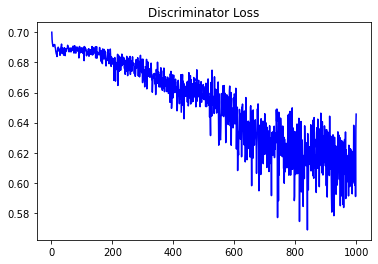

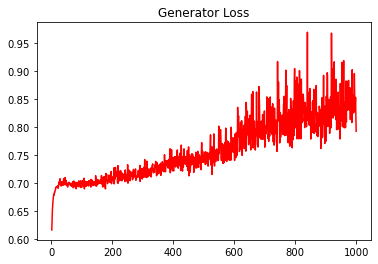

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5726700539290905


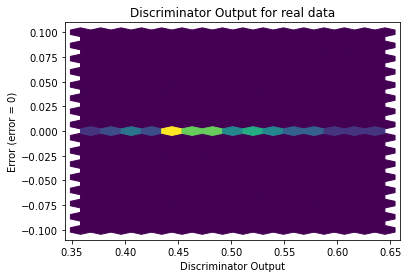

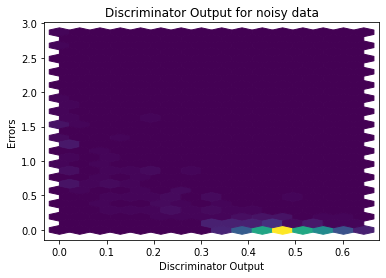

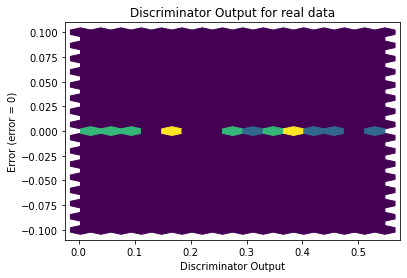

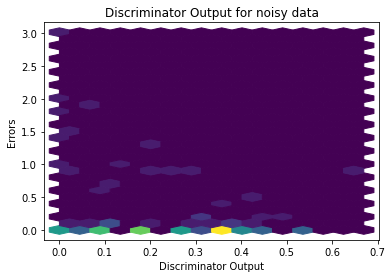

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


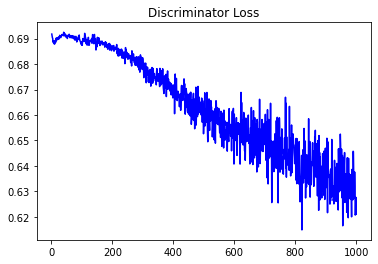

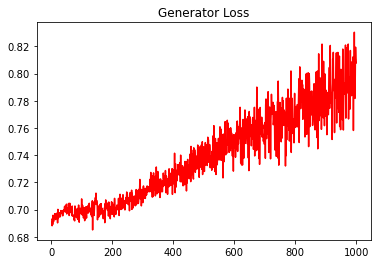

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5159903208762407


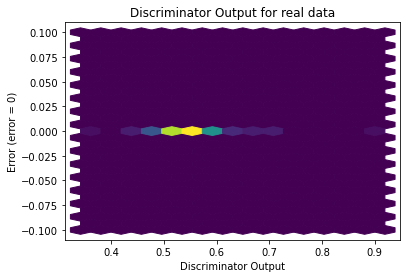

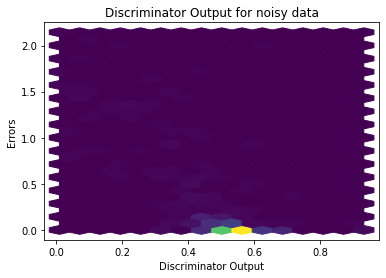

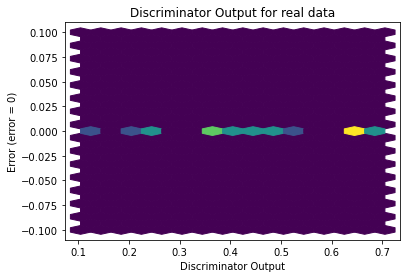

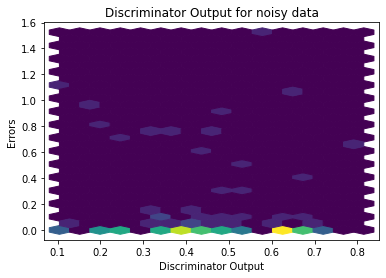

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1045]], requires_grad=True)
